In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Project Datasets/UFC (2010-2020) Data.csv')

In [3]:
data

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE
...,...,...,...,...,...,...,...,...,...,...,...
5523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'location',
       'country', 'Winner', 'title_bout', 'weight_class', 'gender', 'Favorite',
       'Win_Favorite'],
      dtype='object')

In [4]:
data.isna().sum()

,0
R_fighter,1288
B_fighter,1288
R_odds,1288
B_odds,1288
date,1288
location,1288
country,1288
Winner,1288
title_bout,1288
weight_class,1288


In [5]:
# creating a field to find the betting favorite based on the odds field

data['Favorite']=np.where(data['R_odds']<data['B_odds'],data['R_fighter'],data['B_fighter'])

In [6]:
# dropping rows with NaN or null values

data=data.dropna()

In [7]:
data

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,Favorite
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Lightweight,MALE,Kevin Lee
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Welterweight,MALE,Gilbert Burns
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,Renato Moicano
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Blue,False,Light Heavyweight,MALE,Johnny Walker
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Red,False,Lightweight,MALE,Francisco Trinaldo
...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,False,Lightweight,MALE,Duane Ludwig
4236,John Howard,Daniel Roberts,-210.0,175.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,John Howard
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,Brendan Schaub
4238,Mike Pierce,Julio Paulino,-420.0,335.0,3/21/2010,"Broomfield, Colorado, USA",USA,Red,False,Welterweight,MALE,Mike Pierce


In [8]:
data.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'location',
       'country', 'Winner', 'title_bout', 'weight_class', 'gender',
       'Favorite'],
      dtype='object')

In [9]:
print(data['Winner'].shape)
print(data['R_fighter'].shape)
print(data['B_fighter'].shape)

(4240,)
(4240,)
(4240,)


In [10]:
# writing out name of fighter who win from the winner column

data['Winner']=np.where(data['Winner']=='Red',data['R_fighter'],data['B_fighter'])

<ipython-input-10-194b37e41e1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Winner']=np.where(data['Winner']=='Red',data['R_fighter'],data['B_fighter'])


In [11]:
data

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,Favorite
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Charles Oliveira,False,Lightweight,MALE,Kevin Lee
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Gilbert Burns,False,Welterweight,MALE,Gilbert Burns
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Renato Moicano,False,Lightweight,MALE,Renato Moicano
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Nikita Krylov,False,Light Heavyweight,MALE,Johnny Walker
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Francisco Trinaldo,False,Lightweight,MALE,Francisco Trinaldo
...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Darren Elkins,False,Lightweight,MALE,Duane Ludwig
4236,John Howard,Daniel Roberts,-210.0,175.0,3/21/2010,"Broomfield, Colorado, USA",USA,John Howard,False,Welterweight,MALE,John Howard
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,3/21/2010,"Broomfield, Colorado, USA",USA,Brendan Schaub,False,Heavyweight,MALE,Brendan Schaub
4238,Mike Pierce,Julio Paulino,-420.0,335.0,3/21/2010,"Broomfield, Colorado, USA",USA,Mike Pierce,False,Welterweight,MALE,Mike Pierce


In [12]:
# creating a field which compares winner and favorite

data['Win_Favorite']=np.where(data['Winner']==data['Favorite'],1,0)

<ipython-input-12-6b40d7a77c2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Win_Favorite']=np.where(data['Winner']==data['Favorite'],1,0)


In [13]:
data

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,gender,Favorite,Win_Favorite
0,Kevin Lee,Charles Oliveira,-145.0,135.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Charles Oliveira,False,Lightweight,MALE,Kevin Lee,0
1,Demian Maia,Gilbert Burns,160.0,-170.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Gilbert Burns,False,Welterweight,MALE,Gilbert Burns,1
2,Renato Moicano,Damir Hadzovic,-345.0,315.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Renato Moicano,False,Lightweight,MALE,Renato Moicano,1
3,Johnny Walker,Nikita Krylov,-137.0,127.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Nikita Krylov,False,Light Heavyweight,MALE,Johnny Walker,0
4,Francisco Trinaldo,John Makdessi,-160.0,150.0,3/14/2020,"Brasilia, Distrito Federal, Brazil",Brazil,Francisco Trinaldo,False,Lightweight,MALE,Francisco Trinaldo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Duane Ludwig,Darren Elkins,-155.0,135.0,3/21/2010,"Broomfield, Colorado, USA",USA,Darren Elkins,False,Lightweight,MALE,Duane Ludwig,0
4236,John Howard,Daniel Roberts,-210.0,175.0,3/21/2010,"Broomfield, Colorado, USA",USA,John Howard,False,Welterweight,MALE,John Howard,1
4237,Brendan Schaub,Chase Gormley,-260.0,220.0,3/21/2010,"Broomfield, Colorado, USA",USA,Brendan Schaub,False,Heavyweight,MALE,Brendan Schaub,1
4238,Mike Pierce,Julio Paulino,-420.0,335.0,3/21/2010,"Broomfield, Colorado, USA",USA,Mike Pierce,False,Welterweight,MALE,Mike Pierce,1


In [14]:
data['Win_Favorite'].sum()

2749

In [15]:
# percentage when betting favorite won

print('Between 2010-2020, the betting favorite won around',round(data['Win_Favorite'].sum()/len(data),3)*100, '% of all fights')

Between 2010-2020, the betting favorite won around 64.8 % of all fights


In [16]:
data.groupby(['country'])['Win_Favorite'].sum().head(50).sort_values(ascending=False)

,Win_Favorite
country,
USA,1625
Brazil,270
Canada,213
United Kingdom,113
Australia,97
Sweden,46
Mexico,43
China,39
Japan,34


<ipython-input-31-c49388b5e40a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'], errors='coerce')
<ipython-input-31-c49388b5e40a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['date', 'R_odds', 'B_odds', 'Winner'], inplace=True)


Percentage of times the betting favorite won (2010-2020): 65.12%


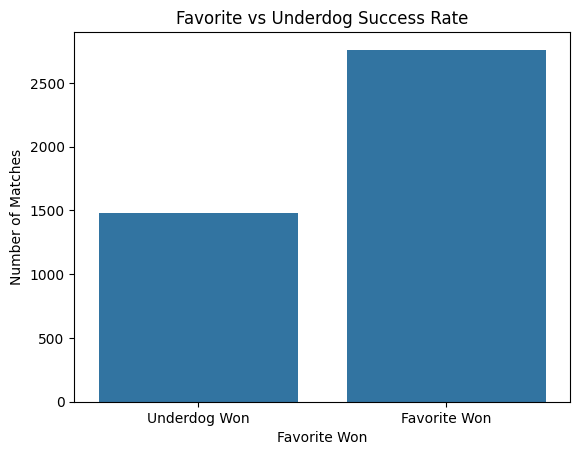

Top 10 Fighters by Match Count:
Donald Cerrone      34
Jim Miller          28
Charles Oliveira    26
Demian Maia         25
Rafael Dos Anjos    25
Ross Pearson        24
Jeremy Stephens     23
Dustin Poirier      23
Max Holloway        22
Nik Lentz           22
Name: count, dtype: int64


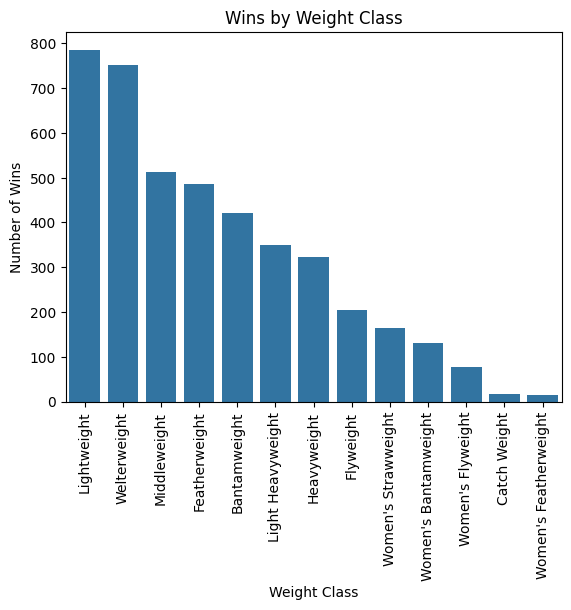

Model Accuracy for Predicting Favorite Wins: 0.65


In [31]:
# Verify required columns
required_columns = ['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'date', 'Winner', 'weight_class', 'Win_Favorite']
for col in required_columns:
    if col not in data.columns:
        raise KeyError(f"Missing required column: {col}")

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with missing critical data
data.dropna(subset=['date', 'R_odds', 'B_odds', 'Winner'], inplace=True)

# Filter data between 2010 and 2020
filtered_data = data[
    (data['date'].dt.year >= 2010) & (data['date'].dt.year <= 2020)
]

# Betting Analysis: Calculate Percentage of Times the Favorite Won
# Use the minimum odds to determine the favorite
filtered_data['favorite_odds'] = filtered_data[['R_odds', 'B_odds']].min(axis=1)
filtered_data['underdog_odds'] = filtered_data[['R_odds', 'B_odds']].max(axis=1)

# Determine if the favorite won
def did_favorite_win(row):
    if row['favorite_odds'] == row['R_odds']:
        return row['Winner'] == row['R_fighter']
    elif row['favorite_odds'] == row['B_odds']:
        return row['Winner'] == row['B_fighter']
    return False

filtered_data['favorite_won'] = filtered_data.apply(did_favorite_win, axis=1)
favorite_win_rate = filtered_data['favorite_won'].mean() * 100

print(f"Percentage of times the betting favorite won (2010-2020): {favorite_win_rate:.2f}%")

# Visualize Favorite vs. Underdog Success
sns.countplot(data=filtered_data, x='favorite_won')
plt.title('Favorite vs Underdog Success Rate')
plt.xlabel('Favorite Won')
plt.ylabel('Number of Matches')
plt.xticks([0, 1], ['Underdog Won', 'Favorite Won'])
plt.show()

# Top Fighter Analysis
top_fighters = pd.concat([
    filtered_data['R_fighter'],
    filtered_data['B_fighter']
]).value_counts().head(10)
print("Top 10 Fighters by Match Count:")
print(top_fighters)

# Win Method Analysis (if available)
if 'Win_Method' in data.columns:
    win_methods = filtered_data['Win_Method'].value_counts(normalize=True) * 100
    print("Win Method Distribution (%):")
    print(win_methods)

    # Visualize Win Methods
    win_methods.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Win Methods')
    plt.ylabel('')
    plt.show()

# Weight Class Analysis
weight_class_wins = filtered_data['weight_class'].value_counts()
sns.barplot(x=weight_class_wins.index, y=weight_class_wins.values)
plt.title('Wins by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

# Predictive Modeling: Logistic Regression for Favorite Wins
# Feature Engineering
X = filtered_data[['favorite_odds', 'underdog_odds']]
y = filtered_data['favorite_won'].astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy for Predicting Favorite Wins: {accuracy:.2f}")

# Save the Insights
filtered_data.to_csv('ufc_analysis_results.csv', index=False)